In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# import models
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv("breast_cancer.csv")

In [3]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Unamed:32 colomn needs to be dropped

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

the 'id' column as no influence and the Unnamed column has no values. Hence, I'll drop them.

In [6]:
data.drop(["Unnamed: 32",'id'],axis=1,inplace=True)

In [7]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The diagnosis column has values as "M" and "B" for Malignant and Benign. I am converting them to 1 and 0.

In [8]:
data['diagnosis']= np.where(data['diagnosis']=='M',1,0)
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Explorative Data Analysis

## Correlations

In [9]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

there are three types of features in this dataaset. 
- 'mean' feature
- 'se' feature
- 'worst' feature
to get better visualization of the correlation I am separating them to these feature groups

In [10]:
print(data.columns[1:11])
print(data.columns[11:21])
print(data.columns[21:])
mean_features = data.columns[1:11]
se_features   = data.columns[11:21]
worst_features= data.columns[21:]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


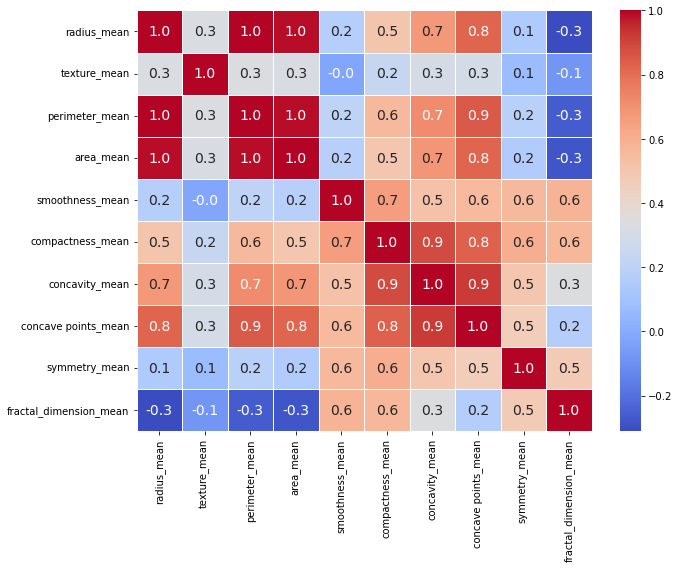

In [13]:
# mean_features correlations
plt.figure(figsize=[10,8])
sns.heatmap(data= data[mean_features].corr(),annot=True,linewidths=0.5,cmap='coolwarm',
            annot_kws={"fontsize":14},fmt='0.1f')

plt.tight_layout()
plt.savefig("images/corr1.png",facecolor='white', transparent=False)


- radius_mean, perimeter_mean, and area_mean are highly correlated. Hence will use radius_mean.
- compactness_mean,concavity_mean, and concave points_mean are also highly correlated. I will use compactness_mean

Let's check the se_features and worst_features.


se_features correlations------


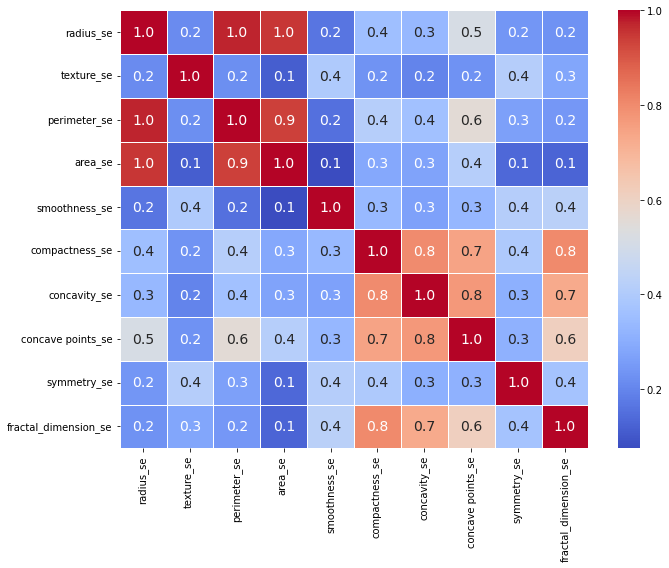

In [15]:
print('se_features correlations------')
plt.figure(figsize=[10,8])
sns.heatmap(data= data[se_features].corr(),annot=True,linewidths=0.5,cmap='coolwarm',
            annot_kws={"fontsize":14},fmt='0.1f')

plt.tight_layout()
plt.savefig("images/corr_se.png",facecolor='white', transparent=False)

worst_features correlations------


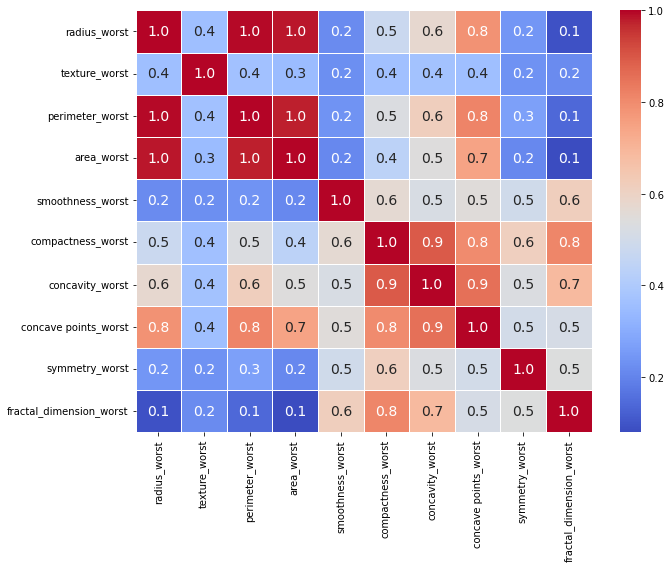

In [16]:
print('worst_features correlations------')
plt.figure(figsize=[10,8])
sns.heatmap(data= data[worst_features].corr(),annot=True,linewidths=0.5,cmap='coolwarm',
            annot_kws={"fontsize":14},fmt='0.1f')

plt.tight_layout()
plt.savefig("images/corr_worst.png",facecolor='white', transparent=False)

like mean_features the se_features and worst_features also show same correlations. Hence I will use
radius_se',concavity_se, radius_worst and concavity_worst

In [17]:
features_to_drop = ['perimeter_mean','area_mean',
                    'perimeter_se','area_se',
                    'perimeter_worst','area_worst',
                   'concavity_mean','concave points_mean',
                    'concavity_se','concave points_se',
                    'concavity_worst','concave points_worst']

In [18]:
data.drop(features_to_drop,axis=1,inplace=True)

In [19]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [20]:
data.head(5)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.2364,0.07678


mean_features 
 ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']


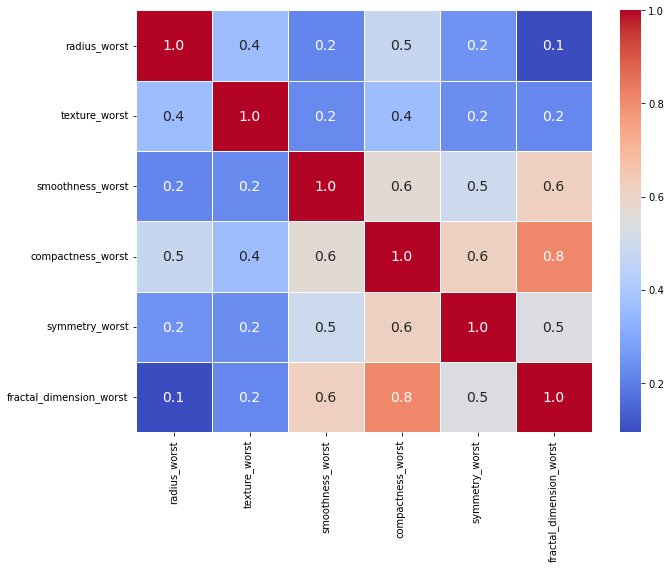

se_features 
 ['radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


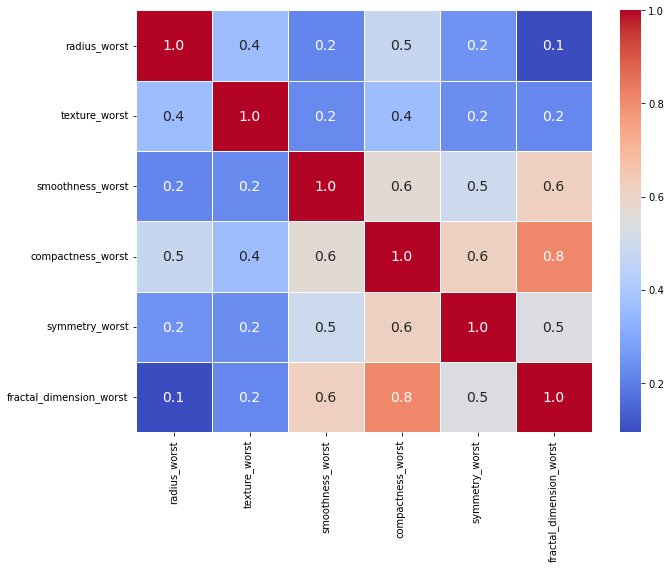

worst_features 
 ['radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']


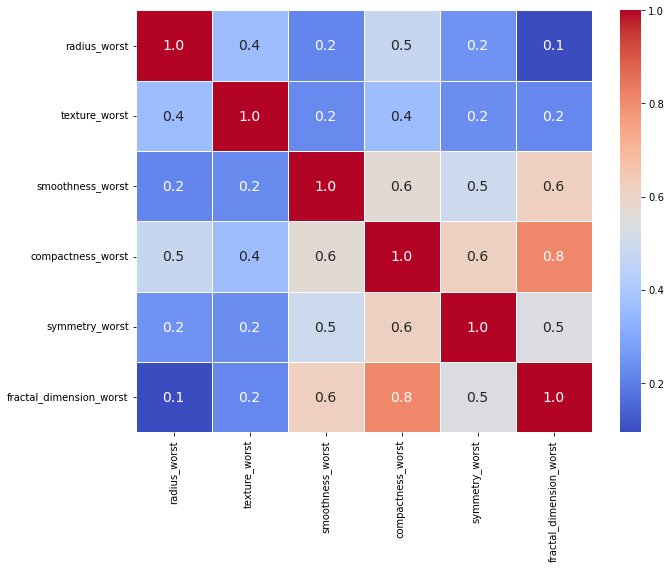

In [21]:
mean_features = [c for c in data.columns if 'mean' in c]
se_features   = [c for c in data.columns if 'se' in c]
worst_features= [c for c in data.columns if 'worst' in c]
print('mean_features \n',mean_features)


plt.figure(figsize=[10,8])
sns.heatmap(data= data[worst_features].corr(),annot=True,linewidths=0.5,cmap='coolwarm',
            annot_kws={"fontsize":14},fmt='0.1f')
plt.tight_layout()
plt.savefig("images/corr_mean_1.png",facecolor='white', transparent=False)
plt.show()


print('se_features \n',se_features)

plt.figure(figsize=[10,8])
sns.heatmap(data= data[worst_features].corr(),annot=True,linewidths=0.5,cmap='coolwarm',
            annot_kws={"fontsize":14},fmt='0.1f')
plt.tight_layout()
plt.savefig("images/corr_se_1.png",facecolor='white', transparent=False)
plt.show()

print('worst_features \n',worst_features)
plt.figure(figsize=[10,8])
sns.heatmap(data= data[worst_features].corr(),annot=True,linewidths=0.5,cmap='coolwarm',
            annot_kws={"fontsize":14},fmt='0.1f')
plt.tight_layout()
plt.savefig("images/corr_worst_1.png",facecolor='white', transparent=False)

### plot histogram of all the features

In [22]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [23]:
data1 = data.copy()
data1 = data1.loc[:,'radius_mean':]
data1

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193,25.380,17.33,0.16220,0.66560,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532,24.990,23.41,0.12380,0.18660,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571,23.570,25.53,0.14440,0.42450,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208,14.910,26.50,0.20980,0.86630,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115,22.540,16.67,0.13740,0.20500,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239,25.450,26.40,0.14100,0.21130,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498,23.690,38.25,0.11660,0.19220,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892,18.980,34.12,0.11390,0.30940,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.006185,25.740,39.42,0.16500,0.86810,0.4087,0.12400


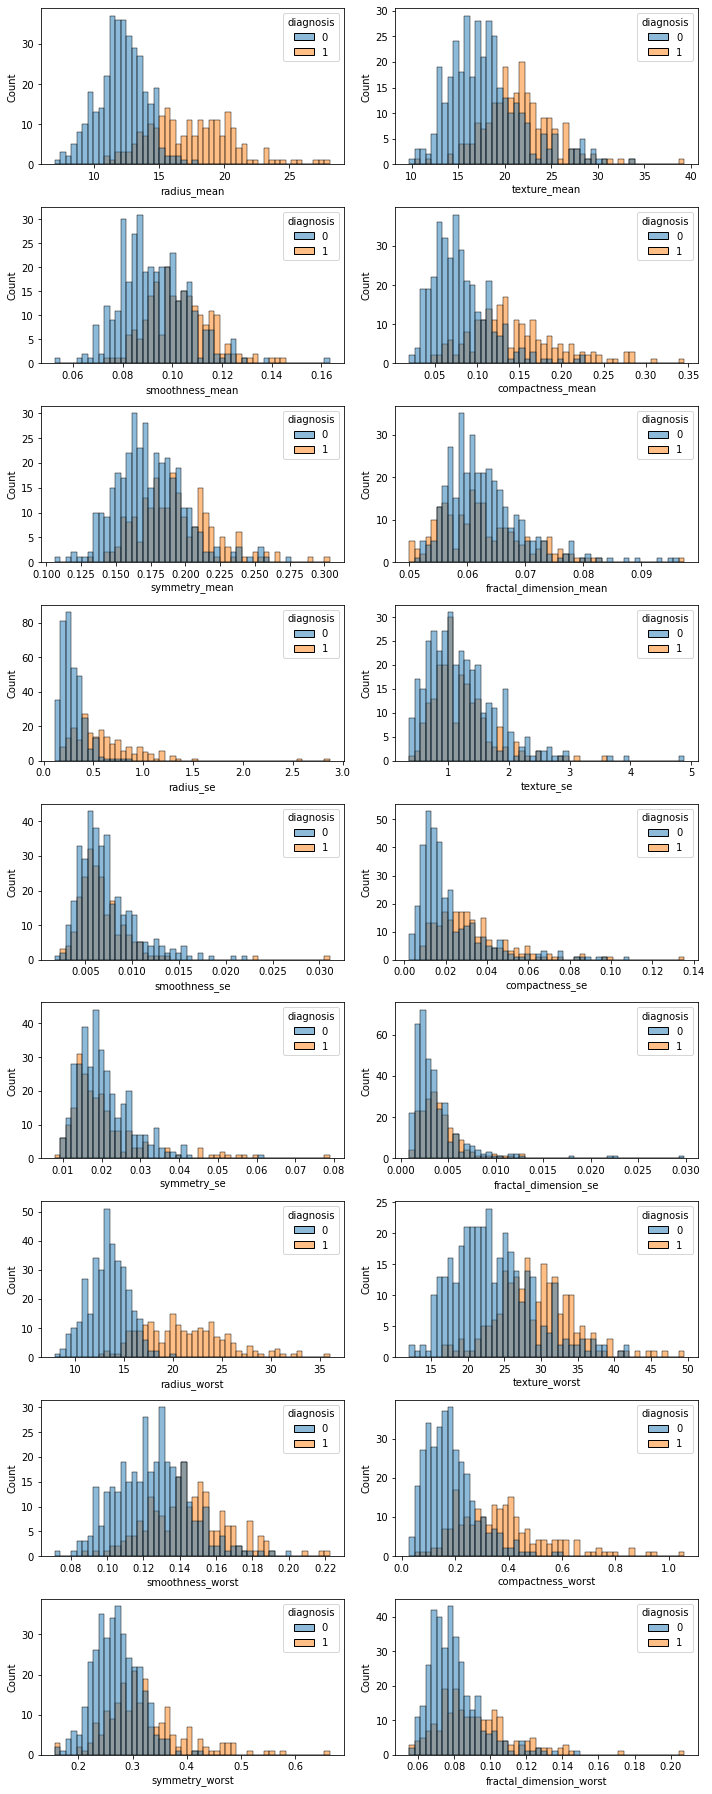

In [24]:
n_cols = 2
n_rows = len(data.columns)//n_cols 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize = [10,25])

positions = list(np.ndindex(n_rows,n_cols))
for i,c in enumerate(data1.columns):
    sns.histplot(data[[c,'diagnosis']],x=c,hue='diagnosis',ax = axes[positions[i]],bins=50)

fig.subplots_adjust(hspace = 1)
plt.tight_layout()
plt.savefig("images/distribution_before_scaling.png",facecolor='white', transparent=False)

for simplicity I am using all these features here for classification.

# Model performance before scaling

In [25]:
y = data['diagnosis']
x = data.drop(['diagnosis'],axis=1)
print(x.head(5),y)

   radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0         0.2419                 0.07871     1.0950      0.9053   
1         0.1812                 0.05667     0.5435      0.7339   
2         0.2069                 0.05999     0.7456      0.7869   
3         0.2597                 0.09744     0.4956      1.1560   
4         0.1809                 0.05883     0.7572      0.7813   

   smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  \
0       0.006399         0.04904      0.03003              0.006193   
1       0.005225         0.01308      0.01389       

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1234,test_size=0.3)

## models

In [27]:
models = []
random_state = 1234
models.append(('LR', LogisticRegression(random_state = random_state,solver='liblinear',max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = random_state)))
models.append(('RF', RandomForestClassifier(random_state = random_state)))
models.append(('SVM', SVC(gamma='auto', random_state = random_state)))
models.append(('XGB', GradientBoostingClassifier(random_state = random_state)))
models.append(("LightGBM", LGBMClassifier(random_state = random_state)))
models

[('LR',
  LogisticRegression(max_iter=500, random_state=1234, solver='liblinear')),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier(random_state=1234)),
 ('RF', RandomForestClassifier(random_state=1234)),
 ('SVM', SVC(gamma='auto', random_state=1234)),
 ('XGB', GradientBoostingClassifier(random_state=1234)),
 ('LightGBM', LGBMClassifier(random_state=1234))]

In [28]:
results = []
names   = []

for name, model in models:
    print("name :",name)
    print("model :",model)       
    cv_results = cross_val_score(model, x, y, cv = 10, scoring= "accuracy")
    print(cv_results,"\n")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

name : LR
model : LogisticRegression(max_iter=500, random_state=1234, solver='liblinear')
[0.92982456 0.9122807  0.92982456 0.94736842 0.94736842 0.92982456
 0.96491228 0.9122807  0.87719298 0.96428571] 

LR: 0.931516 (0.025281)
name : KNN
model : KNeighborsClassifier()
[0.89473684 0.92982456 0.94736842 0.89473684 0.92982456 0.94736842
 0.9122807  0.92982456 0.92982456 0.92857143] 

KNN: 0.924436 (0.017598)
name : CART
model : DecisionTreeClassifier(random_state=1234)
[0.92982456 0.89473684 0.89473684 0.92982456 0.94736842 0.94736842
 0.92982456 0.96491228 0.92982456 0.96428571] 

CART: 0.933271 (0.023190)
name : RF
model : RandomForestClassifier(random_state=1234)
[0.98245614 0.9122807  0.89473684 0.96491228 0.98245614 0.96491228
 0.96491228 0.98245614 0.98245614 0.96428571] 

RF: 0.959586 (0.029398)
name : SVM
model : SVC(gamma='auto', random_state=1234)
[0.9122807  0.94736842 0.96491228 0.9122807  0.96491228 0.92982456
 0.92982456 0.94736842 0.96491228 0.89285714] 

SVM: 0.936654 (0

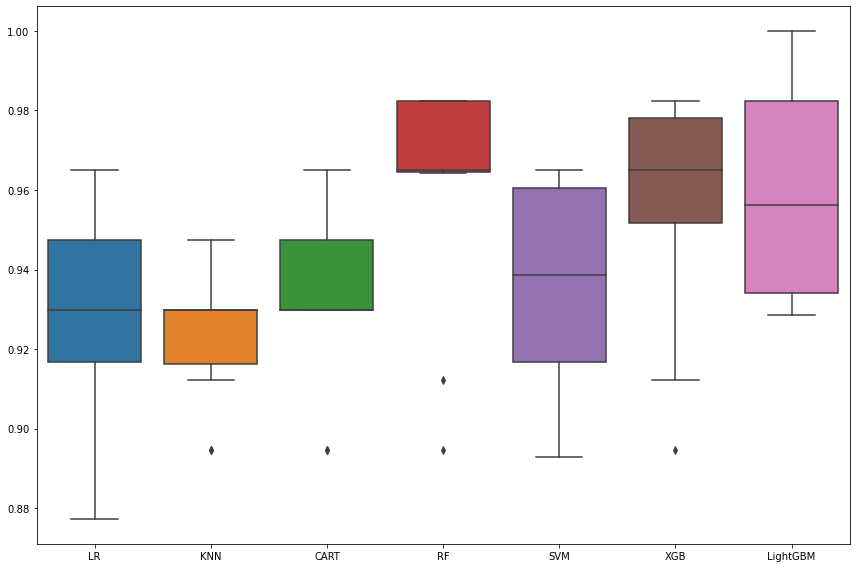

In [29]:
results_df = pd.DataFrame(np.array(results).transpose(),columns=names)
plt.figure(figsize=[12,8])
sns.boxplot(data=results_df)

plt.tight_layout()
plt.savefig("images/model_before_scaling.png",facecolor='white', transparent=False)

## Feature importance of the models:

model : CART


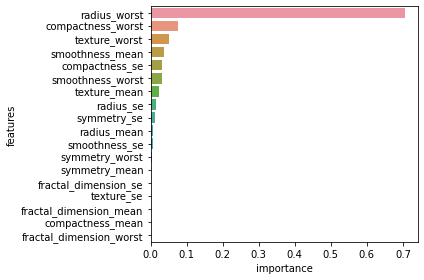

model : RF


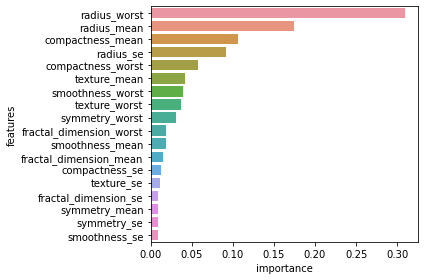

model : XGB


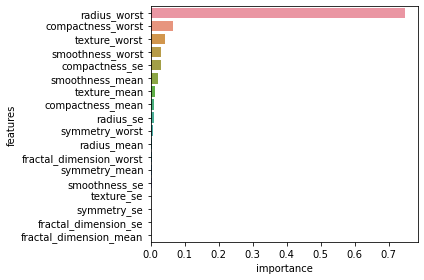

model : LightGBM


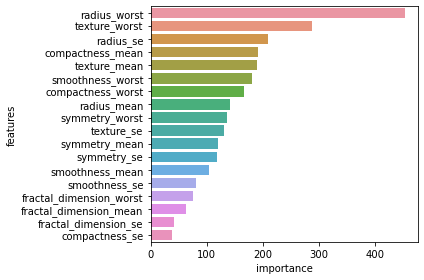

In [78]:
models1 = []
random_state = 1234
models1.append(('CART', DecisionTreeClassifier(random_state = random_state)))
models1.append(('RF', RandomForestClassifier(random_state = random_state)))
models1.append(('XGB', GradientBoostingClassifier(random_state = random_state)))
models1.append(("LightGBM", LGBMClassifier(random_state = random_state)))


for m in models1:
    print("model :",m[0])
    fit_model = m[1].fit(x,y)
    feature_importance_df = pd.DataFrame()
    feature_importance_df['features']=x.columns
    feature_importance_df['importance']=fit_model.feature_importances_
    feature_importance_df.sort_values('importance',ascending=False,inplace=True)
  
    sns.barplot(data=feature_importance_df,x='importance',y='features')
    plt.rc('font',size=10)
    plt.tight_layout()
    plt.savefig("images/_"+m[0]+".png",facecolor='white', transparent=False,dpi=150)
    plt.show()

# Performance after scaling

In [37]:
data_s = data.copy()
data_s.head(5)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.2364,0.07678


In [38]:
data_s.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,0.096360,0.104341,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.020542,0.003795,16.269190,25.677223,0.132369,0.254265,0.290076,0.083946
std,0.483918,3.524049,4.301036,0.014064,0.052813,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.008266,0.002646,4.833242,6.146258,0.022832,0.157336,0.061867,0.018061
min,0.000000,6.981000,9.710000,0.052630,0.019380,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.007882,0.000895,7.930000,12.020000,0.071170,0.027290,0.156500,0.055040
25%,0.000000,11.700000,16.170000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.015160,0.002248,13.010000,21.080000,0.116600,0.147200,0.250400,0.071460
50%,0.000000,13.370000,18.840000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.018730,0.003187,14.970000,25.410000,0.131300,0.211900,0.282200,0.080040
75%,1.000000,15.780000,21.800000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.023480,0.004558,18.790000,29.720000,0.146000,0.339100,0.317900,0.092080
max,1.000000,28.110000,39.280000,0.163400,0.345400,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.078950,0.029840,36.040000,49.540000,0.222600,1.058000,0.663800,0.207500


the features radius_mean, texture_mean, radius_worst, texture_worst have value more than 1. Instead of selecting these featuers I am considering all the features.

## scale data

In [39]:
y1 = data_s['diagnosis']
x1 = data_s.drop(['diagnosis'],axis=1)

In [40]:
from sklearn.preprocessing import RobustScaler

In [42]:
scaler = RobustScaler()
xs1 = scaler.fit_transform(x1)
xs = pd.DataFrame(xs1,columns=x1.columns)
xs.head(5)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.190174,2.824832,1.855030,2.039192,3.126978,-0.316669,0.006382,1.475994,1.358173,1.301299,1.801038,-0.935185,1.051020,2.364252,2.635556,1.884578
1,1.764706,-0.190053,-0.587956,-0.213653,0.059172,-0.578385,0.889655,-0.584440,-0.387974,-0.380485,-0.581731,0.149351,1.733564,-0.231481,-0.255102,-0.131839,-0.106667,0.435500
2,1.549020,0.428064,0.725304,1.027337,0.819527,-0.184086,1.709533,-0.501640,-0.077259,1.012390,0.453125,0.599134,1.487889,0.013889,0.445578,1.107869,1.171852,0.365664
3,-0.477941,0.273535,2.463286,2.921045,2.381657,4.263658,0.695335,0.074988,0.917031,2.794528,4.915865,2.606494,-0.010381,0.126157,2.670068,3.410109,5.653333,4.508244
4,1.696078,-0.799290,0.234020,0.613470,0.050296,-0.321853,1.756592,-0.510389,1.716493,0.214765,-0.140625,0.834632,1.309689,-1.011574,0.207483,-0.035956,-0.678519,-0.158099


### scaled_data distribution

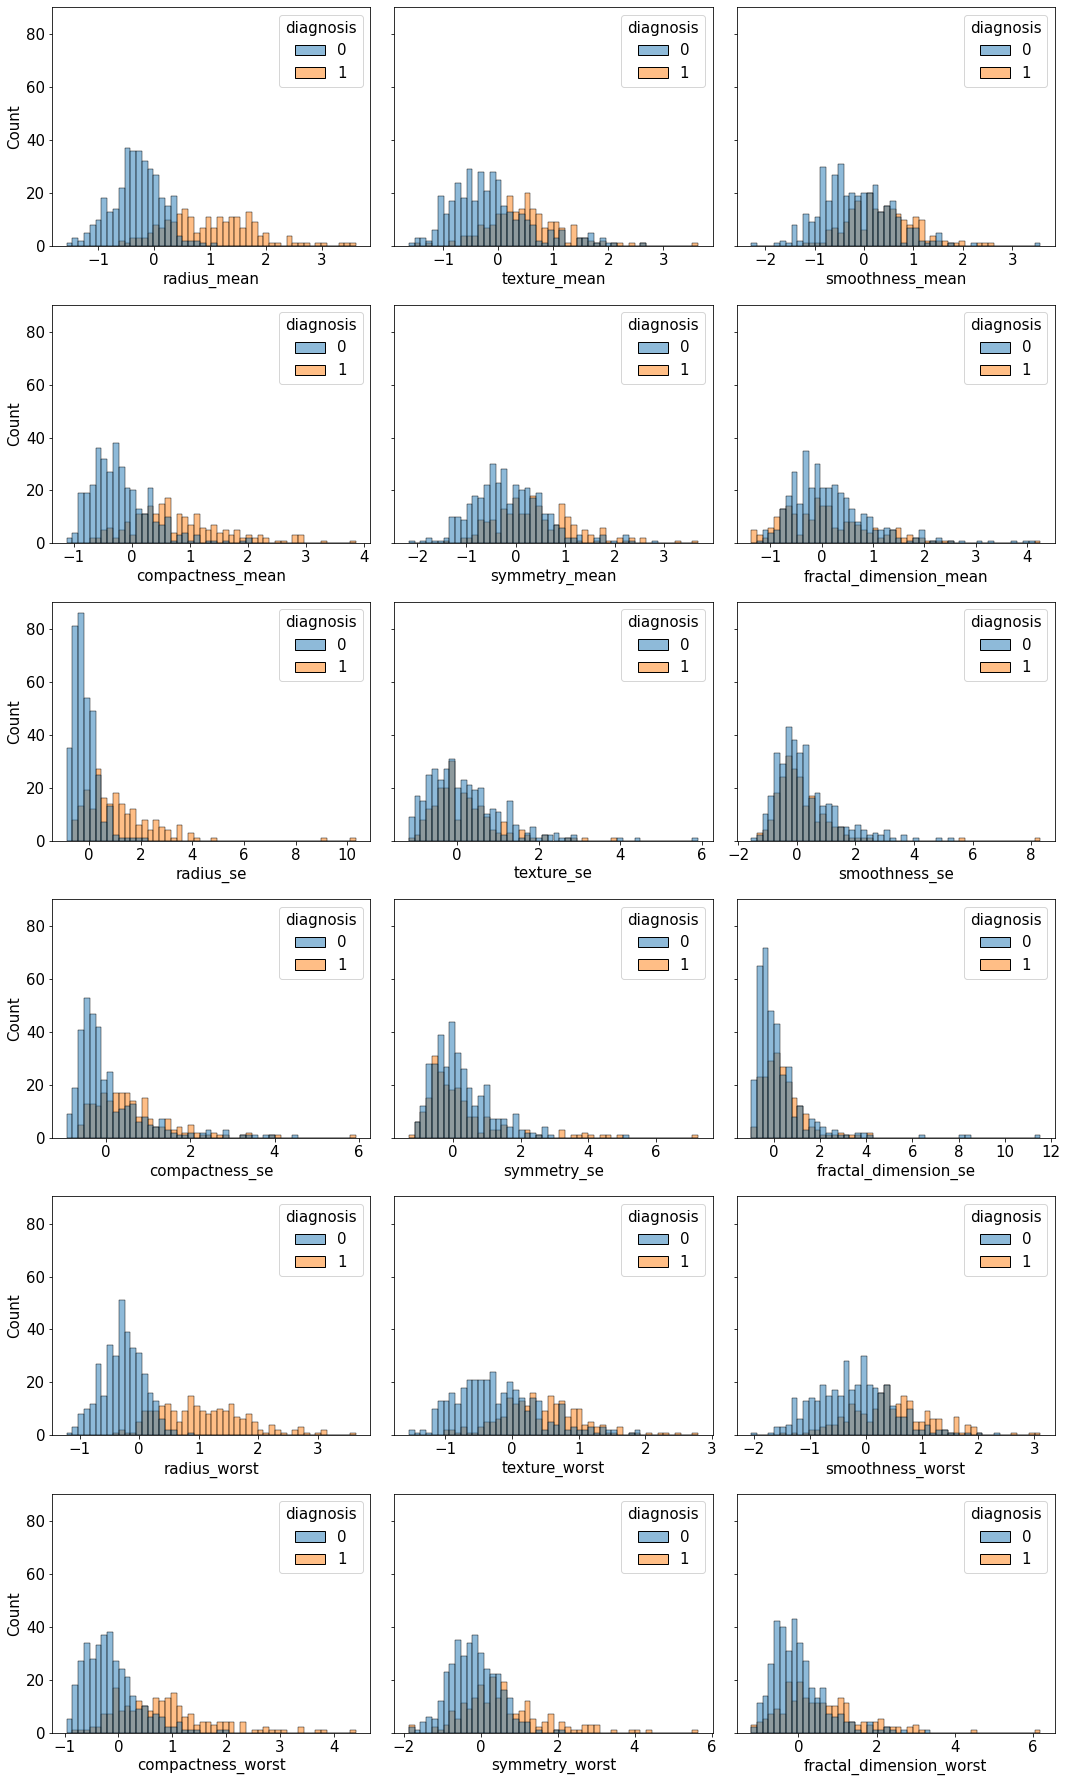

In [62]:
n_cols = 3
n_rows = len(xs.columns)//n_cols 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,sharey=True,
                         figsize = [15,25])
positions = list(np.ndindex(n_rows,n_cols))
for i,c in enumerate(xs.columns):
    sns.histplot(x=xs[c],hue=data_s['diagnosis'],ax = axes[positions[i]],bins=50)

fig.subplots_adjust(hspace = 1)
plt.rc('font',size=15)
plt.tight_layout()
plt.savefig("images/data_after_scaling.png",facecolor='white', transparent=False,dpi=150)

## scaled models

In [63]:
def create_model_list():
    list_name = []
    random_state = 1234
    list_name.append(('LR', LogisticRegression(random_state = random_state,solver='liblinear',max_iter=500)))
    list_name.append(('KNN', KNeighborsClassifier()))
    list_name.append(('CART', DecisionTreeClassifier(random_state = random_state)))
    list_name.append(('RF', RandomForestClassifier(random_state = random_state)))
    list_name.append(('SVM', SVC(gamma='auto', random_state = random_state)))
    list_name.append(('XGB', GradientBoostingClassifier(random_state = random_state)))
    list_name.append(("LightGBM", LGBMClassifier(random_state = random_state)))
    return list_name

In [64]:
scaled_models = create_model_list()

In [65]:
scaled_results = []
scaled_names   = []

for name, model in scaled_models:
    print("name :",name)
    print("model :",model)       
    cv_results = cross_val_score(model, xs, y1, cv = 10, scoring= "accuracy")
    print(cv_results,"\n")
    scaled_results.append(cv_results)
    scaled_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

name : LR
model : LogisticRegression(max_iter=500, random_state=1234, solver='liblinear')
[0.98245614 0.98245614 0.94736842 0.96491228 0.98245614 0.96491228
 0.94736842 1.         1.         0.91071429] 

LR: 0.968264 (0.026127)
name : KNN
model : KNeighborsClassifier()
[0.96491228 0.96491228 0.9122807  0.98245614 0.94736842 0.96491228
 0.92982456 0.96491228 0.92982456 0.91071429] 

KNN: 0.947212 (0.023775)
name : CART
model : DecisionTreeClassifier(random_state=1234)
[0.92982456 0.89473684 0.89473684 0.92982456 0.94736842 0.94736842
 0.92982456 0.96491228 0.92982456 0.96428571] 

CART: 0.933271 (0.023190)
name : RF
model : RandomForestClassifier(random_state=1234)
[0.98245614 0.9122807  0.89473684 0.96491228 0.98245614 0.96491228
 0.96491228 0.98245614 0.98245614 0.96428571] 

RF: 0.959586 (0.029398)
name : SVM
model : SVC(gamma='auto', random_state=1234)
[0.98245614 0.96491228 0.89473684 0.98245614 1.         0.98245614
 0.92982456 0.98245614 0.98245614 0.92857143] 

SVM: 0.963033 (0

In [66]:
scaled_results_df = pd.DataFrame(np.array(scaled_results).transpose(),columns=scaled_names)


## comparison of models before and after scaling data

In [67]:
print('results before scaling : \n',results_df.head(5))
print('results after scaling  : \n',scaled_results_df.head(5))


results before scaling : 
          LR       KNN      CART        RF       SVM       XGB  LightGBM
0  0.929825  0.894737  0.929825  0.982456  0.912281  0.982456  0.982456
1  0.912281  0.929825  0.894737  0.912281  0.947368  0.912281  0.929825
2  0.929825  0.947368  0.894737  0.894737  0.964912  0.894737  0.929825
3  0.947368  0.894737  0.929825  0.964912  0.912281  0.964912  0.964912
4  0.947368  0.929825  0.947368  0.982456  0.964912  0.982456  1.000000
results after scaling  : 
          LR       KNN      CART        RF       SVM       XGB  LightGBM
0  0.982456  0.964912  0.929825  0.982456  0.982456  0.982456  0.982456
1  0.982456  0.964912  0.894737  0.912281  0.964912  0.912281  0.929825
2  0.947368  0.912281  0.894737  0.894737  0.894737  0.894737  0.912281
3  0.964912  0.982456  0.929825  0.964912  0.982456  0.964912  0.964912
4  0.982456  0.947368  0.947368  0.982456  1.000000  0.982456  1.000000


In [70]:
results_df_melt = pd.melt(results_df)
results_df_melt['scaled']='NO'
results_df_melt.head(3)

,variable,value,scaled
0,LR,0.929825,NO
1,LR,0.912281,NO
2,LR,0.929825,NO


In [71]:
scaled_results_df_melt = pd.melt(scaled_results_df)
scaled_results_df_melt['scaled']='Yes'
scaled_results_df_melt.head(3)

,variable,value,scaled
0,LR,0.982456,Yes
1,LR,0.982456,Yes
2,LR,0.947368,Yes


In [72]:
combined_results_df = pd.concat([results_df_melt,scaled_results_df_melt])
combined_results_df.head(5)

,variable,value,scaled
0,LR,0.929825,NO
1,LR,0.912281,NO
2,LR,0.929825,NO
3,LR,0.947368,NO
4,LR,0.947368,NO


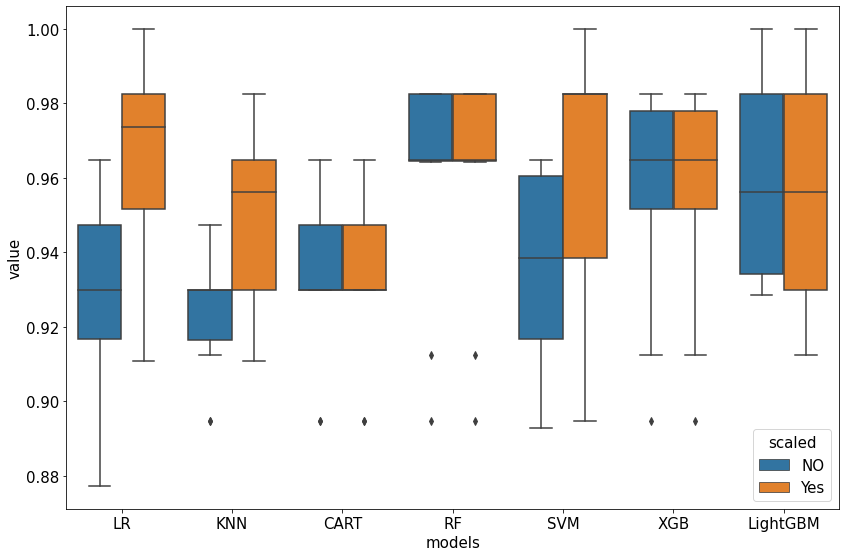

In [75]:
plt.figure(figsize=[12,8])
sns.boxplot(data=combined_results_df, x='variable',y='value',hue='scaled')

plt.rc('font',size=15)
plt.tight_layout()
plt.xlabel('models')
plt.savefig("images/model_comparison.png",facecolor='white', transparent=False,dpi=150)
plt.show()

# Conclusion

- The radius_mean, perimeter_mean, and area_mean are highly correlated. Hence, I used radius_mean.
- Similarly compactness_mean,concavity_mean, and concave points_mean are also highly correlated. I   used compactness_mean.

- After testing 7 machine learning model I observed RandomForest model is providing best accuracy score.

- Scaling data improved the accuracy score of LogisticRegression and SVM.